<font size="5">Procesar imagenes ABI y seguir un sistema de nubes en el tiempo. Extraer informaciones globales como Areas de lluvia fuerte y débil</font>

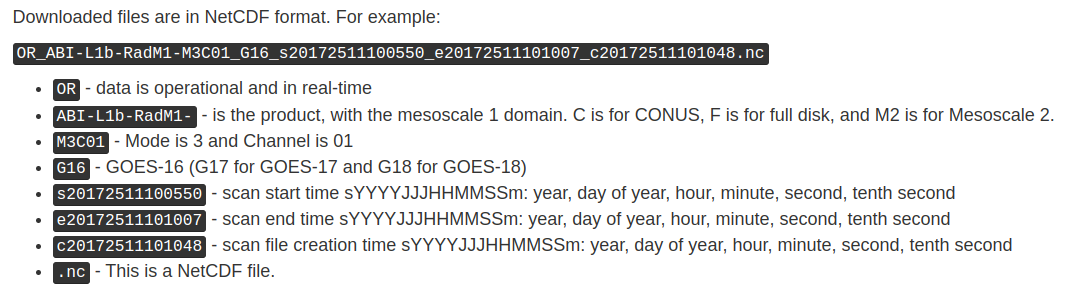

In [37]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
import numpy as np

from netCDF4 import Dataset
import cartopy.crs as ccrs  # Plot maps
import os
import sys

from util_imag_2023 import *


# Función de realce lineal al p porciento
def realce(vec, p=2):
    aux = np.sort(vec.flatten())
    imin = int(len(aux) * p / 100)
    imax = int(len(aux) * (100 - p) / 100)
    vmin = float(aux[imin])
    vmax = float(aux[imax])
    rimag = (vec - vmin) / (vmax - vmin)
    rimag[rimag < 0] = 0
    rimag[rimag > 1] = 1
    return rimag

In [2]:
dir_nc = '/home/msuarez/Downloads/Goes16/'

Filelist = glob.glob(dir_nc+'*.nc')
Filelist.sort()
Filelist

['/home/msuarez/Downloads/Goes16/OR_ABI-L1b-RadF-M3C01_G16_s20180961500406_e20180961511173_c20180961511217.nc',
 '/home/msuarez/Downloads/Goes16/OR_ABI-L1b-RadF-M3C02_G16_s20180961500406_e20180961511173_c20180961511211.nc',
 '/home/msuarez/Downloads/Goes16/OR_ABI-L1b-RadF-M3C03_G16_s20180961500406_e20180961511173_c20180961511220.nc',
 '/home/msuarez/Downloads/Goes16/OR_ABI-L1b-RadF-M3C04_G16_s20180961500406_e20180961511173_c20180961511197.nc',
 '/home/msuarez/Downloads/Goes16/OR_ABI-L1b-RadF-M3C05_G16_s20180961500406_e20180961511173_c20180961511218.nc',
 '/home/msuarez/Downloads/Goes16/OR_ABI-L1b-RadF-M3C06_G16_s20180961500406_e20180961511178_c20180961511215.nc',
 '/home/msuarez/Downloads/Goes16/OR_ABI-L1b-RadF-M3C07_G16_s20180961500406_e20180961511184_c20180961511220.nc',
 '/home/msuarez/Downloads/Goes16/OR_ABI-L1b-RadF-M3C08_G16_s20180961500406_e20180961511173_c20180961511220.nc',
 '/home/msuarez/Downloads/Goes16/OR_ABI-L1b-RadF-M3C09_G16_s20180961500406_e20180961511178_c201809615112

In [3]:
img_list_import = [Filelist[0],Filelist[1],Filelist[2]]

print('Lista de imagenes a importar:\n')
for i in range(len(img_list_import)): print(img_list_import[i])

Lista de imagenes a importar:

/home/msuarez/Downloads/Goes16/OR_ABI-L1b-RadF-M3C01_G16_s20180961500406_e20180961511173_c20180961511217.nc
/home/msuarez/Downloads/Goes16/OR_ABI-L1b-RadF-M3C02_G16_s20180961500406_e20180961511173_c20180961511211.nc
/home/msuarez/Downloads/Goes16/OR_ABI-L1b-RadF-M3C03_G16_s20180961500406_e20180961511173_c20180961511220.nc


In [4]:
imagenobj_list = []
print('Importando imagenes...')
for i in range(len(img_list_import)): imagenobj_list.append(Dataset(img_list_import[i], 'r'))
print('Imagenes importadas.')

Importando imagenes...
Imagenes importadas.


In [5]:
imagenobj_list[0].variables.keys()

dict_keys(['y', 'x', 'Rad', 'DQF', 't', 'time_bounds', 'goes_imager_projection', 'y_image', 'y_image_bounds', 'x_image', 'x_image_bounds', 'nominal_satellite_subpoint_lat', 'nominal_satellite_subpoint_lon', 'nominal_satellite_height', 'geospatial_lat_lon_extent', 'yaw_flip_flag', 'band_id', 'band_wavelength', 'esun', 'kappa0', 'planck_fk1', 'planck_fk2', 'planck_bc1', 'planck_bc2', 'valid_pixel_count', 'missing_pixel_count', 'saturated_pixel_count', 'undersaturated_pixel_count', 'min_radiance_value_of_valid_pixels', 'max_radiance_value_of_valid_pixels', 'mean_radiance_value_of_valid_pixels', 'std_dev_radiance_value_of_valid_pixels', 'percent_uncorrectable_L0_errors', 'earth_sun_distance_anomaly_in_AU', 'algorithm_dynamic_input_data_container', 'processing_parm_version_container', 'algorithm_product_version_container', 't_star_look', 'band_wavelength_star_look', 'star_id'])

In [6]:
metadato_list = [imagenobj_list[i].variables for i in range(len(img_list_import))]

imagen_list = []

for metadato in metadato_list:
    
    # altura de la orbita del satelite en metros (35786023.0)
    altura=metadato['goes_imager_projection'].perspective_point_height
    # 6378137.0 semieje mayor en metros
    semieje_may=metadato['goes_imager_projection'].semi_major_axis
    # 6356752.31414 semieje menor en metros
    semieje_men=metadato['goes_imager_projection'].semi_minor_axis
    # -75 longitud central
    lon_cen=metadato['goes_imager_projection'].longitude_of_projection_origin

    #img_extent = (-5500000, 5500000, -5500000, 5500000) #dimensiones de la escena en km
    img_extent = (-5434894.67527,5434894.67527,-5434894.67527,5434894.67527)
    pol=semieje_may*altura/(semieje_may+altura) # 5413321.583523803
    ecu=semieje_men*altura/(semieje_may+altura) # 5395171.741097588

    icanal = int(metadato['band_id'][:])
    print ('Canal %d' %icanal)

    imagen_list.append(metadato['Rad'][:].data)

Canal 1
Canal 2
Canal 3


In [7]:
metadato_list[0]['Rad']

<class 'netCDF4._netCDF4.Variable'>
int16 Rad(y, x)
    _FillValue: 1023
    long_name: ABI L1b Radiances
    standard_name: toa_outgoing_radiance_per_unit_wavelength
    _Unsigned: true
    sensor_band_bit_depth: 10
    valid_range: [   0 1022]
    scale_factor: 0.8121064
    add_offset: -25.936647
    units: W m-2 sr-1 um-1
    resolution: y: 0.000028 rad x: 0.000028 rad
    coordinates: band_id band_wavelength t y x
    grid_mapping: goes_imager_projection
    cell_methods: t: point area: point
    ancillary_variables: DQF
unlimited dimensions: 
current shape = (10848, 10848)
filling on

In [8]:
imag_cal_list = []

num_metadato_list = 0

for imagen in imagen_list:

    metadato = metadato_list[num_metadato_list]
    icanal = int(metadato['band_id'][:])
    print ('Canal %d' %icanal)

    if icanal >7:
        print ('Calibrando la imagen (if)')
        #Parámetros de calibracion
        fk1 = metadato['planck_fk1'][0] # DN -> K  (=13432.1)
        fk2 = metadato['planck_fk2'][0] # (=1497.61)
        bc1 = metadato['planck_bc1'][0] # (=0.09102)
        bc2 = metadato['planck_bc2'][0] # (=0.99971)

        imag_cal = (fk2 / (np.log((fk1 / imagen) + 1)) - bc1 ) / bc2-273.15 # K -> C
        imag_cal_list.append(imag_cal)
        # imag_cal es un array de (5424, 5424)
        Unit = "Temperatura de Brillo [°C]"
    else:
        print ('Calibrando la imagen (else)')
        pendiente= metadato['Rad'].scale_factor
        ordenada= metadato['Rad'].add_offset
        imag_cal =imagen*pendiente+ordenada
        imag_cal_list.append(imag_cal)
        Unit = "Radiancia ["+metadato['Rad'].units+"]"

    num_metadato_list = num_metadato_list+1

Canal 1
Calibrando la imagen (else)
Canal 2
Calibrando la imagen (else)
Canal 3
Calibrando la imagen (else)


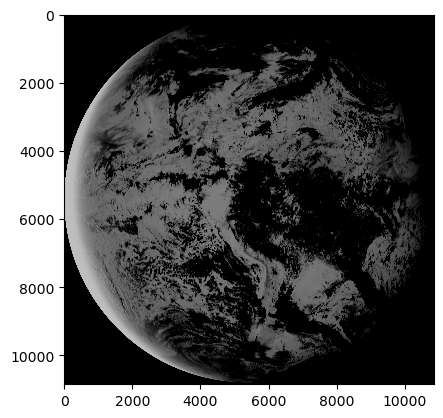

In [14]:
i = 0

plt.imshow(imag_cal_list[i], vmin=-100., vmax=100., cmap='Greys')
plt.show()

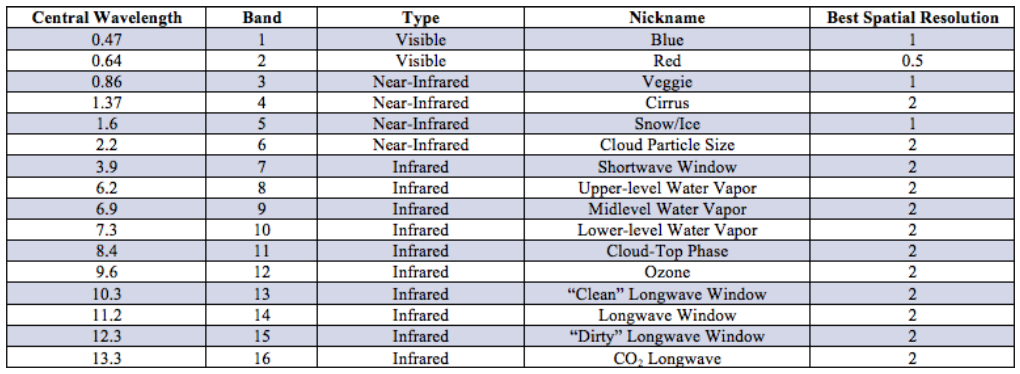

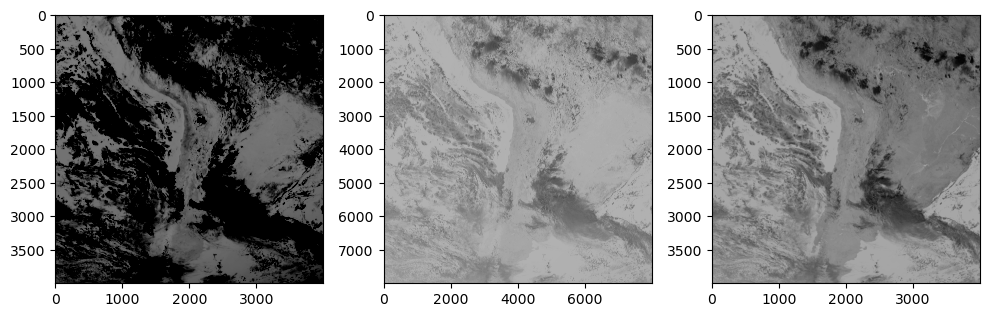

In [18]:
sup_row = 6000
inf_row = 10000
sup_col = 4000
inf_col = 8000

plt.figure(figsize=(10, 10))

plt.subplot(131)
plt.imshow(imag_cal_list[0][sup_row:inf_row,sup_col:inf_col], vmin=-100., vmax=100., cmap='Greys')

plt.subplot(132)
plt.imshow(imag_cal_list[1][sup_row*2:inf_row*2,sup_col*2:inf_col*2], vmin=-100., vmax=100., cmap='Greys')

plt.subplot(133)
plt.imshow(imag_cal_list[2][sup_row:inf_row,sup_col:inf_col], vmin=-100., vmax=100., cmap='Greys')

plt.tight_layout()
plt.show()

In [ ]:
RGB = np.zeros((inf_row-sup_row, inf_col-sup_col, 3))

RGB[:,:,0] = imag_cal_list[0][sup_row:inf_row,sup_col:inf_col]
RGB[:,:,1] = imag_cal_list[1][sup_row:inf_row,sup_col:inf_col]
RGB[:,:,2] = imag_cal_list[2][sup_row:inf_row,sup_col:inf_col]

In [38]:
RGB_realzada = np.zeros((inf_row-sup_row, inf_col-sup_col, 3))

# Aplico realces
RGB_realzada[:,:,0] = realce(imag_cal_list[0][sup_row:inf_row,sup_col:inf_col])
RGB_realzada[:,:,1] = realce(imag_cal_list[1][sup_row:inf_row,sup_col:inf_col])
RGB_realzada[:,:,2] = realce(imag_cal_list[2][sup_row:inf_row,sup_col:inf_col])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


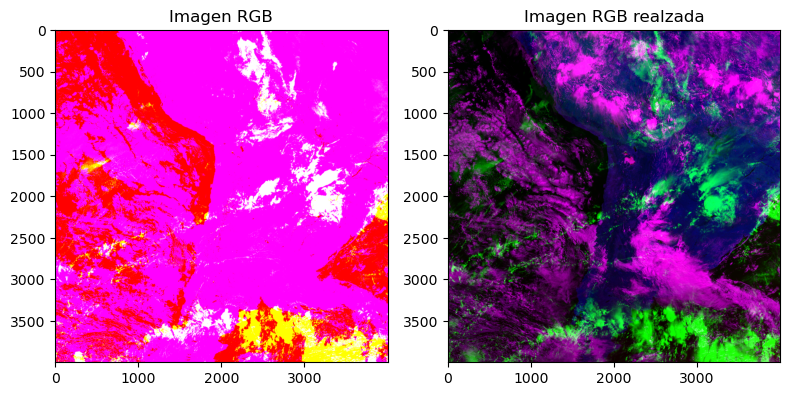

In [39]:
plt.figure(figsize=(8, 8))

plt.subplot(121)
plt.imshow(RGB)
plt.title('Imagen RGB')

plt.subplot(122)
plt.imshow(RGB_realzada)
plt.title('Imagen RGB realzada')

plt.tight_layout()
plt.show()